In [2]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from tifffile import imread
from csbdeep.utils import axes_dict, plot_some, plot_history
from csbdeep.utils.tf import limit_gpu_memory
from csbdeep.io import load_training_data
from csbdeep.models import Config, CARE

/data/u934/service_imagerie/v_kapoor/anaconda2/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/data/u934/service_imagerie/v_kapoor/anaconda2/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/data/u934/service_imagerie/v_kapoor/anaconda2/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


In [3]:
(X,Y), (X_val,Y_val), axes = load_training_data('/data/u934/service_imagerie/v_kapoor/StarDistTraining/UnetSegmentation.npz', validation_split=0.1, verbose=True)

c = axes_dict(axes)['C']
n_channel_in, n_channel_out = X.shape[c], Y.shape[c]

number of training images:	 411955
number of validation images:	 45773
image size (2D):		 (64, 64)
axes:				 SYXC
channels in / out:		 1 / 1


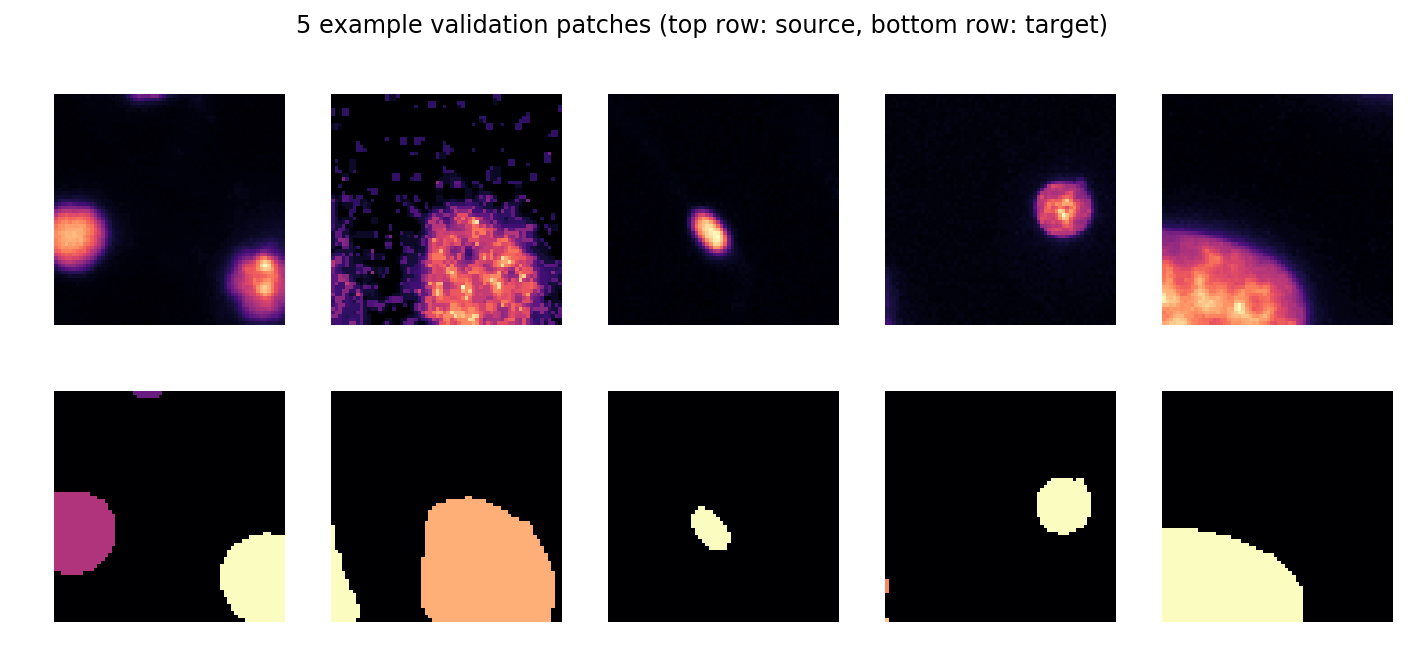

In [4]:
plt.figure(figsize=(12,5))
plot_some(X_val[:5],Y_val[:5])
plt.suptitle('5 example validation patches (top row: source, bottom row: target)');

In [8]:
config = Config(axes, n_channel_in, n_channel_out, train_steps_per_epoch=40)
print(config)
vars(config)

Config(axes='YXC', n_channel_in=1, n_channel_out=1, n_dim=2, probabilistic=False, train_batch_size=16, train_checkpoint='weights_best.h5', train_epochs=100, train_learning_rate=0.0004, train_loss='mae', train_reduce_lr={'patience': 10, 'factor': 0.5}, train_steps_per_epoch=40, train_tensorboard=True, unet_input_shape=(None, None, 1), unet_kern_size=5, unet_last_activation='linear', unet_n_depth=2, unet_n_first=32, unet_residual=True)


{'axes': 'YXC',
 'n_channel_in': 1,
 'n_channel_out': 1,
 'n_dim': 2,
 'probabilistic': False,
 'train_batch_size': 16,
 'train_checkpoint': 'weights_best.h5',
 'train_epochs': 100,
 'train_learning_rate': 0.0004,
 'train_loss': 'mae',
 'train_reduce_lr': {'factor': 0.5, 'patience': 10},
 'train_steps_per_epoch': 40,
 'train_tensorboard': True,
 'unet_input_shape': (None, None, 1),
 'unet_kern_size': 5,
 'unet_last_activation': 'linear',
 'unet_n_depth': 2,
 'unet_n_first': 32,
 'unet_residual': True}

In [9]:
model = CARE(config, 'UNet_model', basedir='models')

/data/u934/service_imagerie/v_kapoor/anaconda2/envs/tensorflowpy3pt5/lib/python3.5/site-packages/csbdeep/models/care_standard.py:99: UserWarning: output path for model already exists, files may be overwritten: /data/u934/service_imagerie/v_kapoor/anaconda2/bin/CSBDeep/examples/CAREforCurie/UNet/models/UNet_model
  warnings.warn('output path for model already exists, files may be overwritten: %s' % str(self.logdir.resolve()))


In [ ]:
history = model.train(X,Y, validation_data=(X_val,Y_val))

Epoch 1/100
40/40 [==============================] - 77s 2s/step - loss: 0.0802 - mse: 0.0309 - mae: 0.0802 - val_loss: 0.0751 - val_mse: 0.0308 - val_mae: 0.0751
Epoch 2/100
40/40 [==============================] - 76s 2s/step - loss: 0.0729 - mse: 0.0302 - mae: 0.0729 - val_loss: 0.0723 - val_mse: 0.0303 - val_mae: 0.0723
Epoch 3/100
40/40 [==============================] - 77s 2s/step - loss: 0.0698 - mse: 0.0292 - mae: 0.0698 - val_loss: 0.0709 - val_mse: 0.0297 - val_mae: 0.0709
Epoch 4/100
40/40 [==============================] - 77s 2s/step - loss: 0.0711 - mse: 0.0307 - mae: 0.0711 - val_loss: 0.0706 - val_mse: 0.0299 - val_mae: 0.0706
Epoch 5/100
40/40 [==============================] - 77s 2s/step - loss: 0.0692 - mse: 0.0300 - mae: 0.0692 - val_loss: 0.0679 - val_mse: 0.0291 - val_mae: 0.0679
Epoch 6/100
40/40 [==============================] - 77s 2s/step - loss: 0.0691 - mse: 0.0302 - mae: 0.0691 - val_loss: 0.0679 - val_mse: 0.0289 - val_mae: 0.0679
Epoch 7/100
40/40 [===

In [ ]:
print(sorted(list(history.history.keys())))
plt.figure(figsize=(16,5))
plot_history(history,['loss','val_loss'],['mse','val_mse','mae','val_mae']);

In [ ]:
plt.figure(figsize=(12,7))
_P = model.keras_model.predict(X_val[:5])
if config.probabilistic:
    _P = _P[...,:(_P.shape[-1]//2)]
plot_some(X_val[:5],Y_val[:5],_P,pmax=99.5)
plt.suptitle('5 example validation patches\n'      
             'top row: input (source),  '          
             'middle row: target (ground truth),  '
             'bottom row: predicted from source');

In [ ]:
model.export_TF()